**WE WILL BEGIN TO DERIVE INSIGHTS AFTER CLEANING DATA, PREPROCESSING:**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel("//content//Data Analyst - Test Data.xlsx")

In [ ]:
df.head(3)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia


In [ ]:
#Removing leading/trailing whitespace in textual data
df['Review'] = df['Review'].str.strip()
df['Location'] = df['Location'].str.strip()

In [ ]:
#Checking for and handle missing values
missing_values = df.isnull().sum()
missing_values

Review        55
date           0
Location    4738
dtype: int64

In [ ]:
# Fill missing values in 'Location' with 'Unknown' as dropping them can lead a lot of data loss
df['Location'] = df['Location'].fillna('Unknown')

In [ ]:
#We will drop missing reviews
df.dropna(inplace=True)

In [ ]:
#Converting dates to a proper datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
#Removing any duplicate entries
df.drop_duplicates(inplace=True)

In [ ]:
import re

# Function to clean "Read more" and "Read less"
def clean_review(review):
    return re.sub(r'\s*Read more\s*Read less\s*', '', review, flags=re.IGNORECASE)

# Apply the function to the Review column
df['Review'] = df['Review'].apply(clean_review)

In [ ]:
# For simplicity, let's count the number of words in each review
df['Review_Length'] = df['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
# Group data by 'Location' and analyze the average review length
location_grouped = df.groupby('Location')['Review_Length'].agg(['mean', 'count']).reset_index()
location_grouped = location_grouped.sort_values(by='count', ascending=False)

**INSIGHTS:**

In [ ]:
#1. Location with the highest number of reviews
top_location = location_grouped.iloc[0]['Location']
second_most_top = location_grouped.iloc[1]['Location']
print("Location with the highest number of reviews:", top_location,"\n","Followed by:",  second_most_top)

Location with the highest number of reviews: Unknown 
 Followed by: United States of America


In [ ]:
#Since we know most of the locations were null, therefore it has highest number of reviews.
#So we can conclude USA has most number of reviews.

In [ ]:
#2. Average Overall review length and of top location
top_location_avg_review_length = location_grouped.iloc[0]['mean']
second_location_avg_review_length = location_grouped.iloc[1]['mean']
overall_avg_review_length = df['Review_Length'].mean()

print("Average review length for the top location(UNKNOWN):", top_location_avg_review_length,"\n","Followed by:(USA)",  second_location_avg_review_length,"\n","Overall average review length", overall_avg_review_length)

Average review length for the top location(UNKNOWN): 39.23395180209 
 Followed by:(USA) 30.71551724137931 
 Overall average review length 39.69654309400907


<ipython-input-55-421b60e322eb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='count', data=top_10_locations, palette='viridis')


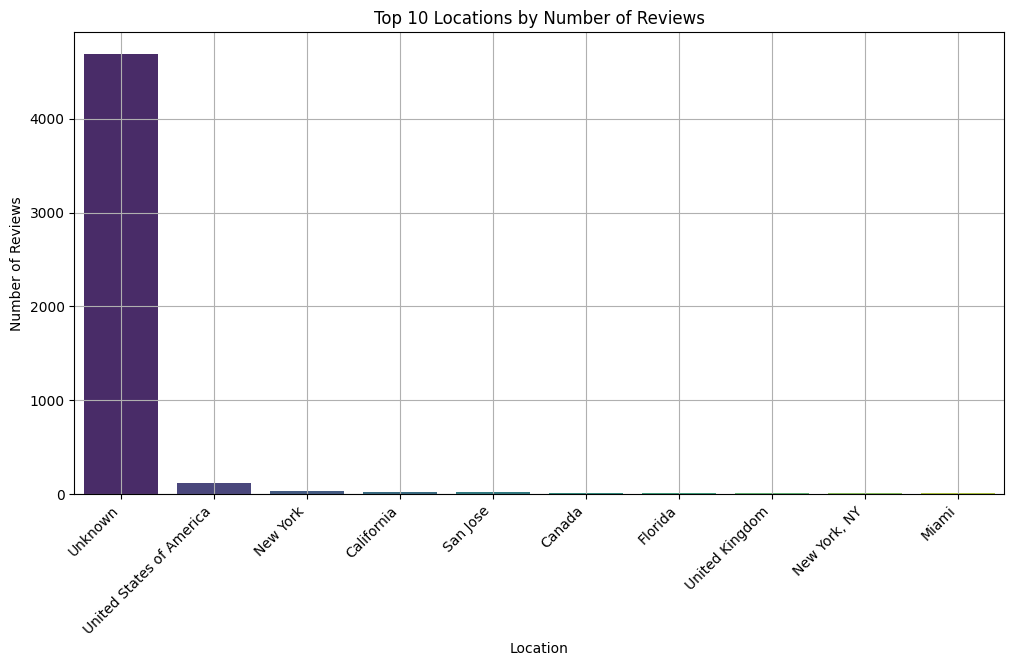

In [ ]:
#3. Distribution of reviews across locations

location_grouped = df.groupby('Location').size().reset_index(name='count')

# Sort and get the top 10 locations
top_10_locations = location_grouped.nlargest(10, 'count')

# Plot the distribution of review counts for the top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='count', data=top_10_locations, palette='viridis')
plt.title('Top 10 Locations by Number of Reviews')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(True)
plt.show()

In [ ]:
#4. Most frequent review date
most_frequent_review_date = df['date'].mode()[0]
print("Most frequent review date:", most_frequent_review_date)

Most frequent review date: 2019-06-01 00:00:00


In [ ]:
#5. Most common words in reviews
from collections import Counter
import re
import nltk
from tabulate import tabulate

#Download NLTK stopwords
nltk.download('stopwords')

#Combining all reviews into a single string
all_reviews = ' '.join(df['Review'])

#Cleaning the text
all_reviews = re.sub(r'\W+', ' ', all_reviews).lower()

#Split into words and remove stop words
word_list = all_reviews.split()

#Loading NLTK stop words & Removing stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
word_list = [word for word in word_list if word not in stop_words]

#Counting frequencies & Geting the most common words
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Print output in table format
print(tabulate(common_words, headers=['Word', 'Count'], tablefmt='grid'))

+----------+---------+
| Word     |   Count |
+==========+=========+
| room     |    3512 |
+----------+---------+
| hotel    |    3006 |
+----------+---------+
| staff    |    1798 |
+----------+---------+
| great    |    1637 |
+----------+---------+
| location |    1381 |
+----------+---------+
| clean    |    1367 |
+----------+---------+
| stay     |    1313 |
+----------+---------+
| nice     |    1255 |
+----------+---------+
| rooms    |    1116 |
+----------+---------+
| good     |     977 |
+----------+---------+


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
